Get data

In [728]:
file_path = "./data/X.csv"
X = pd.read_csv(file_path)

file_path = "./data/y.csv"
y = pd.read_csv(file_path)


In [729]:
df_org = X.join(y.set_index('id'))

df_mod = df_org

df_mod.set_index('id',inplace= True)

# clear all null lines
for column in df_mod.columns:
    nulls_mask = df_mod[column].notnull()  # or column_with_nulls.isna()
    df_mod = df_mod[nulls_mask]

# drop unnamed columns
df_mod.drop(columns='Unnamed: 0', inplace=True)
df_mod.drop(columns='Unnamed: 0.1',inplace=True)

# removing data point with Gender = 'O'
df_mod = df_mod[df_mod['Gender']!='O']

# setting 'id' column as index
# df_mod.set_index('id', inplace = True)

# deal with categorial columns

label_encoder = LabelEncoder()
for column in df_mod.select_dtypes(include=['object']).columns:
    df_mod[column + '_encoded'] = label_encoder.fit_transform(df_mod[column])

# Train test split
X_train, X_test, y_train, y_test =train_test_split(df_mod.drop(columns = 'Salary'), df_mod.Salary, test_size = 0.3, random_state = 42)

# get all relevant column names
categorical_columns = df_mod.select_dtypes(include=['object']).columns.tolist()

# drop_categorial = True
# if (drop_categorial):
#     df_mod = df_mod.drop(columns=categorical_columns)
# else:
#     # drop some of them
#     categorical_columns_remove = 'Job Title'
#     categorical_columns = [item for item in categorical_columns if item != categorical_columns_remove]


#     df_mod = pd.get_dummies(df_mod,columns = categorical_columns)

# df = df_mod

In [730]:
df_mod

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,professionalism,Salary,Gender_encoded,Education Level_encoded,Job Title_encoded,Country_encoded,Race_encoded
id,,,,,,,,,,,,,,,,
2477,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,1150.0,90000.0,1,1,3,0,1
76,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,1100.0,65000.0,0,0,92,4,9
242,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,380.0,200000.0,0,0,136,2,6
5544,34.0,F,master's|degr,marketing|manage,11.0,us,White,2.068465,77.713279,297.0,55000.0,0,4,87,4,9
6017,34.0,F,bachelor's|degr,marketing|manage,9.0,u,White,2.118734,54.683693,256.0,120000.0,0,1,87,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,32.0,F,bachelor,junior|business|development|associat,4.0,canad,Black,2.329507,64.070050,93.0,50000.0,0,0,52,1,3
3677,44.0,M,p,data|scientis,15.0,chin,White,1.945457,93.478548,546.0,120000.0,1,5,19,2,9
6032,25.0,M,high|scho,delivery|drive,1.0,canad,Asian,1.575751,38.216264,0.0,85000.0,1,2,20,1,1


In [731]:
X_train_copy = X_train[['professionalism','Gender_encoded', 'Education Level_encoded', 'Job Title_encoded',
       'Country_encoded', 'Race_encoded']]

In [732]:
# sns.pairplot(df_mod,vars = ['Salary','Gender_encoded', 'Education Level_encoded', 'Job Title_encoded', 'Country_encoded', 'Race_encoded'])



In [733]:
# sns.pairplot(X_train_copy.join(y.set_index('id')), vars = X_train_copy.join(y.set_index('id')).columns, hue = 'Salary')



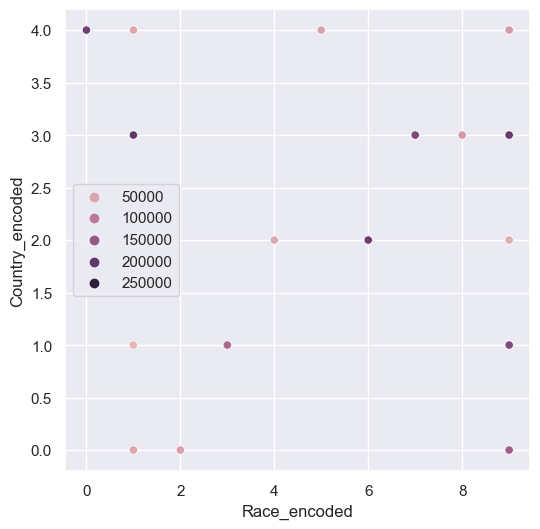

In [734]:
sns.scatterplot(data = X_train.join(y_train),x= 'Race_encoded', y = 'Country_encoded', hue = 'Salary')
plt.legend(loc = 'best')

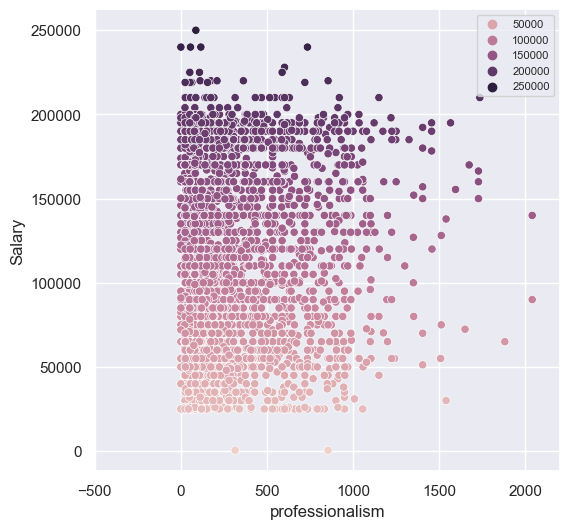

In [735]:
# fig, ax = plt.subplots()
# sns.distplot(data, ax=ax)
# ax.set_xlim(1, 70)
# plt.show()

fig, ax = plt.subplots()
sns.scatterplot(data = X_train.join(y_train),x= 'professionalism', y = 'Salary', hue = 'Salary')
ax.set_xlim(-500, 2200)
plt.legend(loc = 'best', prop={'size':8})
plt.show()

In [736]:
races = X_train['Race_encoded'].unique()
countries = X_train['Country_encoded'].unique()

# sns.pairplot(X_train_copy.join(y), vars = X_train_copy.join(y).columns, hue = 'Salary')

In [737]:
groups.unique().size

17

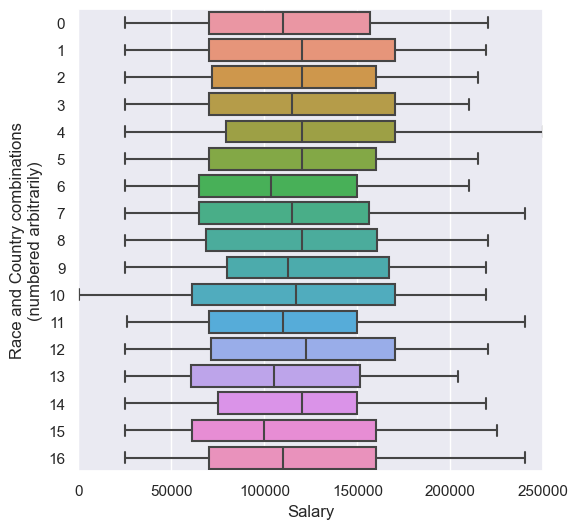

In [738]:
# removing 'Salary' NaN values
data = data[~data['Salary'].isna()]
# grouping by race and country
groups = data.groupby(['Country_encoded', 'Race_encoded']).ngroup()

sns.boxplot(data = data, x = 'Salary', y = groups, orient = 'h').set(ylabel = "Race and Country combinations\n(numbered arbitrarily)", xlim = (0,250000))
# setting sns figure size
sns.set(rc={'figure.figsize':(6,6)})

In [739]:
# The following code performs a Kolmogorov-Smirnov test on these two datasets 
# to determine if they came from the same distribution

from scipy.stats import ks_2samp

#perform Kolmogorov-Smirnov test

ks_2samp(groups[groups == 12], groups[groups == 15])[1]

# i, j = 0,0
# res = []

# pair-wise distribution, KS test:
# for i in range(len(groups.unique())):
#     for j in range(len(groups.unique())):
#         # print(f"i = {i}, j = {j}")
#         # print(ks_2samp(groups[groups == i], groups[groups == j])[1],'\n')
#         res.append(ks_2samp(groups[groups == i], groups[groups == j])[1])

# printing the KS test p-value, to assess whetehr most distribs are statistically different. Answer = Yes.
# print(res.sort())

1.1151471543020886e-95

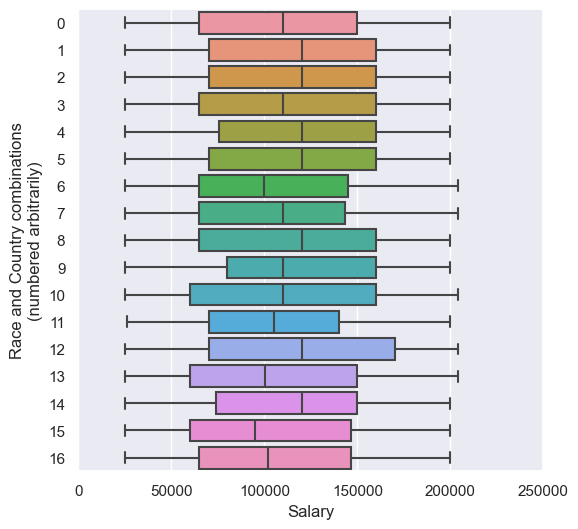

In [740]:
# Filtering out sparse data

data2 = data.loc[(data['professionalism'] < 1001) & (data['Salary'] < 210000) & (data['Salary'] > 10000)] 

# repeating the groupby CountryxRace boxplot analysis:

groups2 = data2.groupby(['Country_encoded', 'Race_encoded']).ngroup()

sns.boxplot(data = data2, x = 'Salary', y = groups2, orient = 'h').set(ylabel = "Race and Country combinations\n(numbered arbitrarily)", xlim = (0,250000))
# setting sns figure size
sns.set(rc={'figure.figsize':(6,6)})

# Data Cleaning decreases intra-group variance and stress inter-groups distrib. differences

In [741]:
# for race in races:
#     for country in countries:


# data2.groupby(['Country_encoded', 'Race_encoded']).ngroup()
# # data2.columns

# # X2 = data2.drop(columns = 'Salary')
# # y2 = data2.Salary


        


In [746]:
def my_fit(X,y):
  X=X.join(y)
  model2 = X.groupby('group_number')[y.name].mean()
  return model2

def my_predict(X,model2):
  y_pred2 = X.group_number.map(model2)
  return y_pred2

def rmsle(y_true: pd.Series, y_pred:pd.Series):
    return (((np.log1p(y_true)-np.log1p(y_pred))**2).mean())**0.5

In [748]:
# custom groupby-based step-wise model, using PRE-CLEANED data (data)

X2 = data.drop(columns = 'Salary')
y2 = data.Salary

from sklearn.metrics import mean_squared_error as mse

for i in range(1,len(X2.columns.values)+1):
    
  # itterate over tested feature combinations
  features = list(X2.columns[:i].values)
  # features = ['Country_encoded', 'Race_encoded']

  # create an X Series grouped by chosen features; each unique feature combination is group-numbered
  X2['group_number'] = X2.groupby(features).ngroup()

  # split the datasets to train and test
  X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

  # create a model per selected features using train data
  model2 = my_fit(X2_train,y2_train)

  # predict y (price) per X_test and model2
  y_pred2 = my_predict(X2_test, model2)

  # calc & print model's rmsle
  rmsle2 = rmsle(y2_test,y_pred2)
  # rmse2 = np.sqrt(mse(y2_test, y_pred2))  


  print(f"per test data, model's rmsle based on {features} is: {rmsle2.round(3)}")
  # print(f"per test data, model's rmse based on {features} is: {rmse2.round(3)}\n")

per test data, model's rmsle based on ['professionalism'] is: 0.236
per test data, model's rmsle based on ['professionalism', 'Gender_encoded'] is: 0.227
per test data, model's rmsle based on ['professionalism', 'Gender_encoded', 'Education Level_encoded'] is: 0.112
per test data, model's rmsle based on ['professionalism', 'Gender_encoded', 'Education Level_encoded', 'Job Title_encoded'] is: 0.026
per test data, model's rmsle based on ['professionalism', 'Gender_encoded', 'Education Level_encoded', 'Job Title_encoded', 'Country_encoded'] is: 0.035
per test data, model's rmsle based on ['professionalism', 'Gender_encoded', 'Education Level_encoded', 'Job Title_encoded', 'Country_encoded', 'Race_encoded'] is: 0.037


In [749]:
# custom groupby-based step-wise model, using CLEAN data (data2)

X2 = data2.drop(columns = 'Salary')
y2 = data2.Salary

from sklearn.metrics import mean_squared_error as mse

for i in range(1,len(X2.columns.values)+1):
    
  # itterate over tested feature combinations
  features = list(X2.columns[:i].values)
  # features = ['Country_encoded', 'Race_encoded']

  # create an X Series grouped by chosen features; each unique feature combination is group-numbered
  X2['group_number'] = X2.groupby(features).ngroup()

  # split the datasets to train and test
  X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

  # create a model per selected features using train data
  model2 = my_fit(X2_train,y2_train)

  # predict y (price) per X_test and model2
  y_pred2 = my_predict(X2_test, model2)

  # calc & print model's rmsle
  rmsle2 = rmsle(y2_test,y_pred2)
  # rmse2 = np.sqrt(mse(y2_test, y_pred2))  


  print(f"per test data, model's rmsle based on {features} is: {rmsle2.round(3)}")
  # print(f"per test data, model's rmse based on {features} is: {rmse2.round(3)}\n")

per test data, model's rmsle based on ['professionalism'] is: 0.236
per test data, model's rmsle based on ['professionalism', 'Gender_encoded'] is: 0.227
per test data, model's rmsle based on ['professionalism', 'Gender_encoded', 'Education Level_encoded'] is: 0.112
per test data, model's rmsle based on ['professionalism', 'Gender_encoded', 'Education Level_encoded', 'Job Title_encoded'] is: 0.026
per test data, model's rmsle based on ['professionalism', 'Gender_encoded', 'Education Level_encoded', 'Job Title_encoded', 'Country_encoded'] is: 0.035
per test data, model's rmsle based on ['professionalism', 'Gender_encoded', 'Education Level_encoded', 'Job Title_encoded', 'Country_encoded', 'Race_encoded'] is: 0.037


In [ ]:
# Q9 - improve your model
# This code iterates through list of diamonds features chosen (from total 1 to total 5 features)
# for each feature selection, it creates a groupby object and grouped by group number (series), 
# a model and a y (diamonds price) prediction
# the rmsle between actual and predicted prices is printed each iteration 
# to identify the best model and minimal rmsle;

# def train_model2(X,y):
#   X=X.join(y)
#   model2 = X.groupby('group_name')[y.name].mean()
#   return model2

# def predict2(X,model2):
#   y_pred2 = X.group_name.map(model2)
#   return y_pred2

# for i in range(1,len(X.columns[:5].values)+1):
#   # itterate over tested feature combinations
#   features = list(X.columns[:i].values)

#   # create an X Series grouped by chosen features; each unique feature combination is group-numbered
#   X['group_name'] = X.groupby(features).ngroup()

#   # split the datasets to train and test
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#   # create a model per selected features using train data
#   model2 = train_model2(X_train,y_train)

#   # predict y (price) per X_test and model2
#   y_pred2 = predict2(X_test, model2)

#   # calc & print model's rmsle
#   rmsle2 = rmsle(y_test,y_pred2)
#   print(f"per test data, model's rmsle based on {features} is: {rmsle2.round(3)}")

In [ ]:
# # My Solution - KNN

# # n_neighbors = list(range(2,20))

# weights = ['uniform','distance']

# leafs = [10, 20, 30, 40, 50]

# for weight in weights:
#   for leaf in leafs:
#     # instantiate class object
#     # print(val)
#     # print(type(val))
#     knr = KNeighborsRegressor(n_neighbors = 5, weights = weight, algorithm = 'ball_tree', leaf_size = leaf)
    
#     # fit
#     knr.fit(X_train,y_train)
    
#     # predict
#     y_pred_knn_train = knr.predict(X_train)
#     y_pred_knn_test = knr.predict(X_test)
    
#     # score
#     knr_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_knn_train))
#     knr_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_knn_test))

#     # print coeffiecients
#     print(f"When weight equals {weight}:")
#     print(f"K-Nearest Neighbour Reg. train model's rmse is {knr_rmse_train:.2f}")
#     print(f"K-Nearest Neighbour Reg. test model's rmse is {knr_rmse_test:.2f}")
#     print(f"rmse_test - rmse_train = {knr_rmse_test - knr_rmse_train}\n")

In [ ]:
X_train.info()

In [ ]:
# df2 = df_org.drop(columns = ['Unnamed: 0.1','Unnamed: 0'])
# df2.set_index('id', inplace =True)
# df2.columns

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df2['Job Title'], df2.Salary, test_size=0.33, random_state=42)

In [ ]:

# # Decision Tree Regressor - My Solution

# min_samples_split = list(range(2,20+1))

# for val in min_samples_split:
#   # instantiate class object
#   dtr = DecisionTreeRegressor(min_samples_split = val)

#   # fit
#   dtr.fit(X_train, y_train)

#   # predict
#   y_pred_train_dtr = dtr.predict(X_train)
#   y_pred_test_dtr = dtr.predict(X_test)


#   # score
#   dtr_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_dtr))
#   dtr_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_dtr))
#   # print coeffiecients
#   print(f"When minimal samples split equals {val}:")
#   print(f"Decision Tree reg. training model's rmse is {dtr_train_rmse:.4f}")
#   print(f"Decision Tree reg. test model's rmse is {dtr_test_rmse:.4f}")
#   print(f"the difference between train's and test's rmse's is {dtr_test_rmse - dtr_train_rmse:.2f}\n")  
#   # print(f"and features {X.columns.values}:")
#   # print(f"Decision Tree reg. model's coefficients are: {dtr.coef_}\n")

In [ ]:
# from sklearn.metrics import mean_squared_error

# # split
# # X_train, X_test, y_train, y_test = train_test_split(X_train[['Gender_encoded','Race_encoded']], df_mod.Salary, test_size=0.33, random_state=42)

# # define alphas to interate through
# alphas = [0.001, 0.01, 0.1,1, 10,100, 1000,10000]

# from sklearn.linear_model import LinearRegression, Lasso, Ridge

# for alpha in alphas:
#   # print(alpha)
#   # instantiate class object
#   lasso = Lasso(alpha = alpha)
#   ridge = Ridge(alpha = alpha)

#   # fit
#   lasso.fit(X_train[['Country_encoded','Race_encoded']], y_train)
#   ridge.fit(X_train[['Country_encoded','Race_encoded']], y_train)

#   # predict
#   y_pred_lasso = lasso.predict(X_test[['Country_encoded','Race_encoded']])
#   y_pred_ridge = ridge.predict(X_test[['Country_encoded','Race_encoded']])

#   # score
#   lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
#   ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

#   # print coeffiecients
#   print(f"lasso rmse is {lasso_rmse:.1f} and ridge rmse is {ridge_rmse:.1f}")
#   print(f'for alpha = {alpha}:')
#   print(f"and features {X_train[['Country_encoded','Race_encoded']].columns.values}:")
#   print(f"lasso coefficients are: {lasso.coef_}")
#   print(f"ridge coefficients are: {ridge.coef_}\n")